**STEPS :-**

1) Problem Statement

2) Collect and Prepare Data

3) Loading data and related work

4) Exploratory Data Analysis(EDA)

5) Preprocess the Data

6) Model Building :
    

*   Decision Tree
*   Random Forest

*   Multiple Linear Regression

*   Support Vector Regression
*   XGBoost

*   LASSO

7) Evaluate the Model


*   R-Squared
*   MSE

*   MAE


# 1) Problem Statement:

The goal of this project is to develop a predictive model that estimates the selling price of used cars based on various attributes such as make, model, year, mileage, fuel type, Registration Status etc. Given historical car sales data, the model aims to provide accurate price predictions to aid buyers and sellers in making informed decisions. Key challenges include handling missing data, selecting appropriate algorithms, and ensuring the model generalizes well to new data.

#2) Collect and Prepare Data

**Data Collection:** Gather data on car sales, including features like make, company_name, model, price, year, location, mileage, fuel type, transmission type, and Registration Status.


**Data Sources:** Identify and obtain datasets from reliable sources (e.g., online marketplaces, car dealerships, public datasets).

















# Coding Time....!

# 3) Loading Packages, Data and Related



*  Loading Packages



In [39]:
#importing necessary libraries
import pandas as pd
import numpy as np               # For mathematical calculations

import seaborn as sns            # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
%matplotlib inline

import warnings                   # To ignore any warnings
warnings.filterwarnings('ignore')


In [29]:
#reading and displaying the first five rows of the dataset
car = pd.read_csv('/content/cleaned_dataset.csv')
car.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [30]:
x = car.drop(columns = ['Price'])
y = car['Price']
display(x.head(), y.head())

,Company Name,Model Name,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


,Price
0,2385000
1,111000
2,1530000
3,1650000
4,1435000


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company Name         46022 non-null  object
 1   Model Name           46022 non-null  object
 2   Model Year           46022 non-null  int64 
 3   Location             46022 non-null  object
 4   Mileage              46022 non-null  int64 
 5   Engine Type          46022 non-null  object
 6   Engine Capacity      46022 non-null  int64 
 7   Color                46022 non-null  object
 8   Assembly             46022 non-null  object
 9   Body Type            46022 non-null  object
 10  Transmission Type    46022 non-null  object
 11  Registration Status  46022 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.2+ MB


In [32]:
x.isna().sum()

,0
Company Name,0
Model Name,0
Model Year,0
Location,0
Mileage,0
Engine Type,0
Engine Capacity,0
Color,0
Assembly,0
Body Type,0


In [33]:
#checking on the type of  the dataset
type(car)

pandas.core.frame.DataFrame

In [34]:
#checking the number of rows and columns
car.shape

(46022, 13)

In [35]:
#checing if there are any missing values presented in the dataset
car.isna().sum()

,0
Company Name,0
Model Name,0
Price,0
Model Year,0
Location,0
Mileage,0
Engine Type,0
Engine Capacity,0
Color,0
Assembly,0


In [36]:
#checking for the unique values in each columns
uniqueValues = car.nunique()
print(uniqueValues)

Company Name             31
Model Name              196
Price                  1419
Model Year               30
Location                  6
Mileage                5573
Engine Type               3
Engine Capacity          75
Color                    24
Assembly                  2
Body Type                 6
Transmission Type         2
Registration Status       2
dtype: int64


In [37]:
#Cheaking for duplicate values in rows
duplicate=car.duplicated().sum()
print(duplicate)

815



*  No duplicate rows.




#4) Exploratory Data Analysis (EDA)




Text(0.5, 1.0, 'Heighest Price for company name')

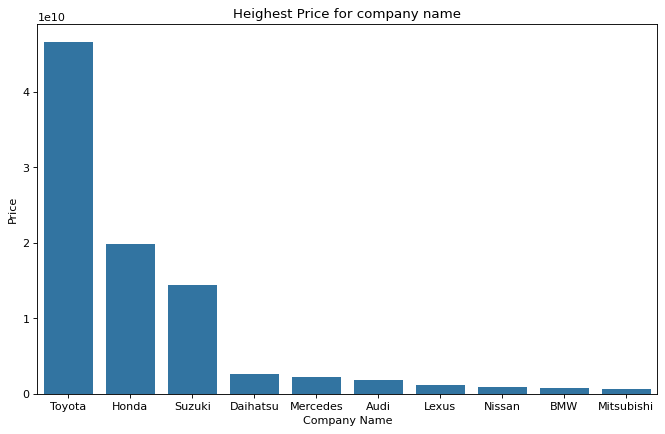

In [ ]:
#cheaking heighest price for company name
plt.figure(figsize=(10,6),dpi=80)
s=car.groupby('Company Name')[['Price']].sum().sort_values('Price',ascending=False).head(10)
sns.barplot(x=s.index,y='Price',data=s)
plt.title('Heighest Price for company name')

* Toyota is a heighest price in companys

Text(0.5, 1.0, 'Distribution of Cars by Company Name')

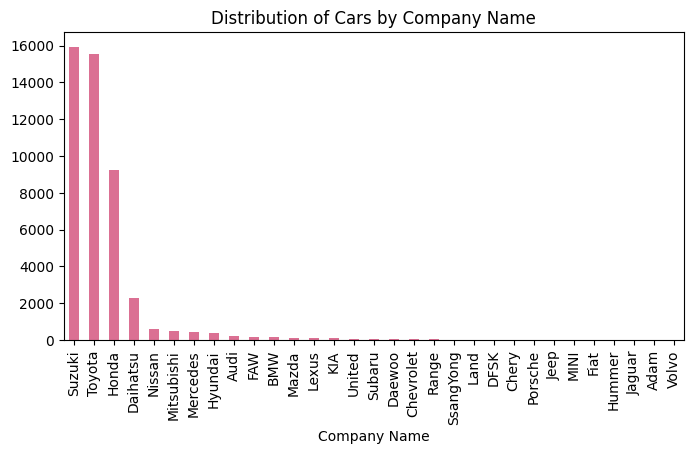

In [ ]:
# Cheaking Distribution of Cars by Company Name
car_c_name = car['Company Name'].value_counts()
car_c_name.plot(kind = 'bar', color = 'palevioletred', figsize = (8,4))
plt.title('Distribution of Cars by Company Name')

*  Suzuki and Toyota cars have the highest distribution.

Text(0.5, 1.0, 'Histogram of Car Prices')

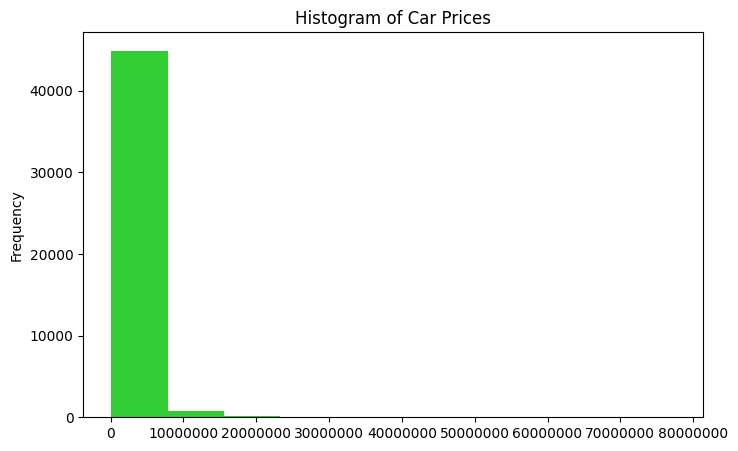

In [ ]:
#Cheaking for mostly car prices range
car_price = car['Price']
plt.ticklabel_format(style = 'plain')
car_price.plot(kind = 'hist', color = 'limegreen', figsize = (8,5))
plt.title('Histogram of Car Prices')

* Mostly the car prices are within the range of 0 to 1000000.

Text(0.5, 1.0, 'Histogram of Car Model Years')

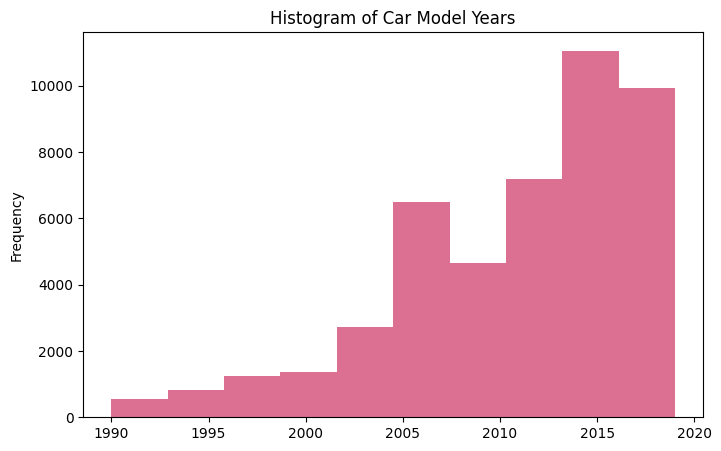

In [ ]:
#Cheaking highly frequency start from the year
car_year = car['Model Year']
car_year.plot(kind = 'hist', color = 'palevioletred', figsize = (8,5))
plt.title('Histogram of Car Model Years')

*  **The car's model year with high frequency starts from the year 2010.**

Text(0.5, 1.0, 'Pie Chart of Car Distribution by Location')

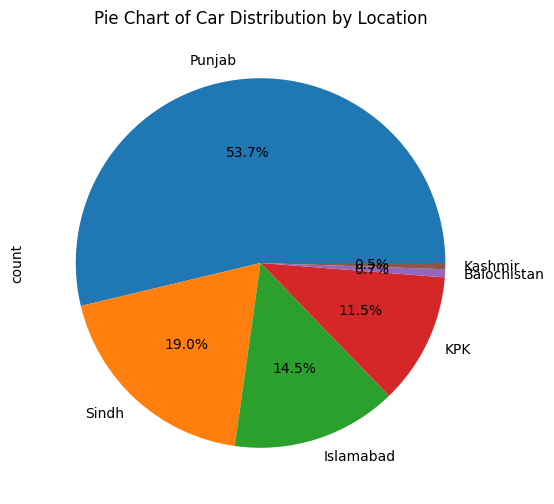

In [ ]:
# Cheaking the location for mostly car available
car_location = car['Location'].value_counts()
car_location.plot(kind = 'pie', figsize = (6,6), autopct='%1.1f%%')
plt.title('Pie Chart of Car Distribution by Location')

- 53.7% of the car is available at the Punjab location.

Text(0.5, 1.0, 'Distribution of Cars by Engine Type')

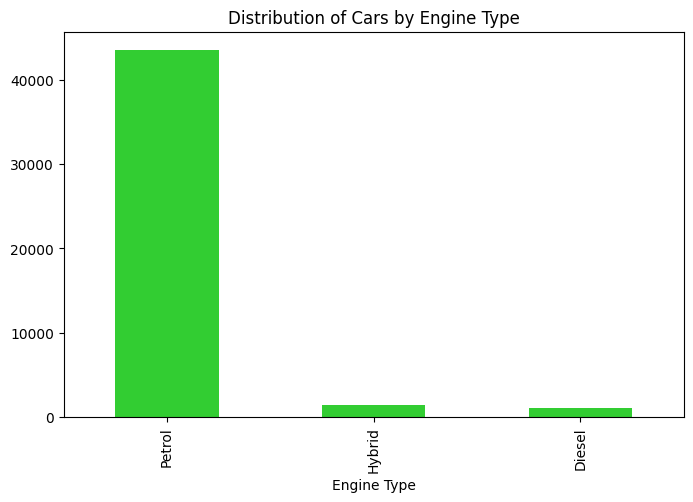

In [ ]:
#Cheaking the mostly used for car engine type
car_engine = car['Engine Type'].value_counts()
car_engine.plot(kind = 'bar', color = 'limegreen', figsize = (8,5))
plt.title('Distribution of Cars by Engine Type')

- Most widely used engine type among the cars is the petrol engine type.

Text(0.5, 1.0, 'Distribution of Cars by Colors')

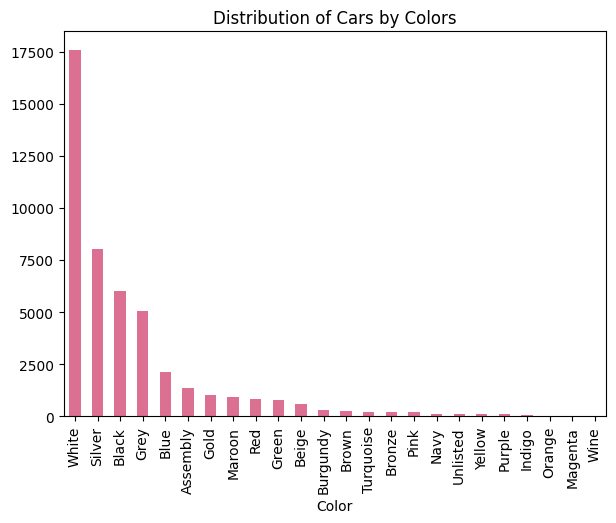

In [ ]:
car_color = car['Color'].value_counts()
car_color.plot(kind = 'bar', color = 'palevioletred', figsize = (7,5))
plt.title('Distribution of Cars by Colors')

- Most of the cars are white in color.

Text(0.5, 1.0, 'Distribution of Cars by Assembly')

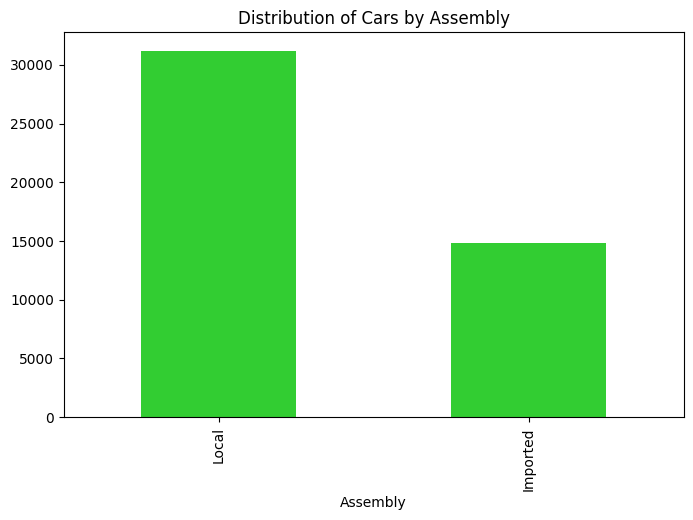

In [ ]:
car_assembly = car['Assembly'].value_counts()
car_assembly.plot(kind = 'bar', color = 'limegreen', figsize = (8,5))
plt.title('Distribution of Cars by Assembly')

- The cars are mostly assembled locally.

Text(0.5, 1.0, 'Distribution of Cars by Body Type')

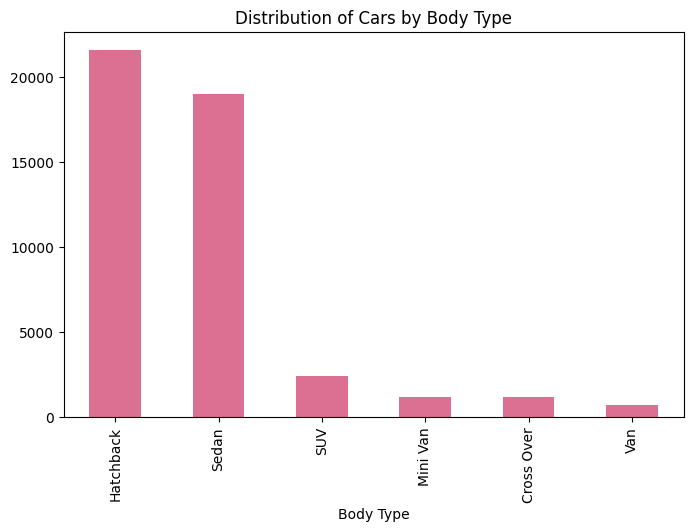

In [ ]:
car_b_type = car['Body Type'].value_counts()
car_b_type.plot(kind = 'bar', color = 'palevioletred', figsize = (8,5))
plt.title('Distribution of Cars by Body Type')

- There are six diffrent types of car body type where hatchback is the highest type.

Text(0.5, 1.0, 'Distribution of Cars by Transmission Type')

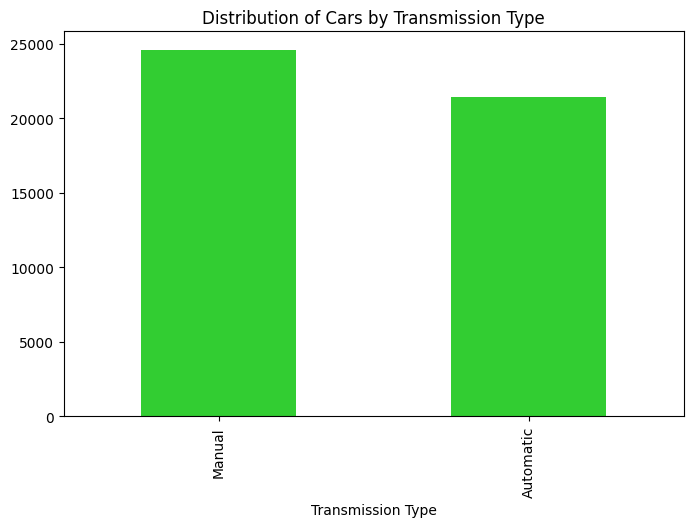

In [ ]:
car_t_type = car['Transmission Type'].value_counts()
car_t_type.plot(kind = 'bar', color = 'limegreen', figsize = (8,5))
plt.title('Distribution of Cars by Transmission Type')

- Manual transmission type has the highest distribution.

Text(0.5, 1.0, 'Percentage Distribution of Cars by Registration Status')

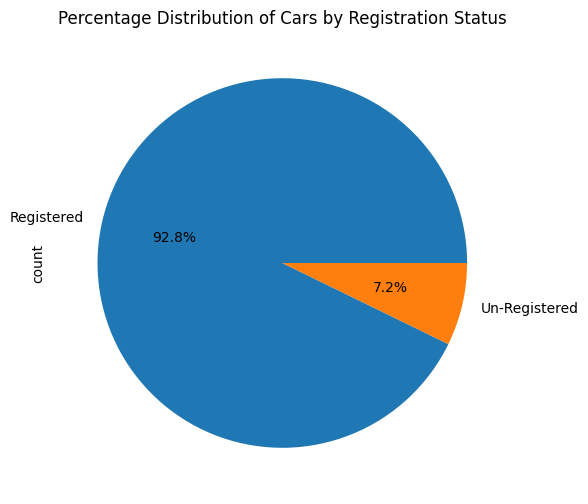

In [ ]:
car_r_status = car['Registration Status'].value_counts()
car_r_status.plot(kind = 'pie', figsize = (6,6), autopct='%1.1f%%')
plt.title('Percentage Distribution of Cars by Registration Status')

- Only 7.2% of the cars are un-registered.

#5) Data Pre-Processing

In [ ]:
car_str=car.copy()
car_str.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
company_mapping = {}
model_mapping = {}
price_mapping = {}
model_year = {}
locs = {}
mileage = {}
engine_type = {}
engine_cap = {}
Colour = {}
assembly = {}
body_type = {}
transmission = {}
registration = {}
for column in car_str.columns:
        encoded_column = label_encoder.fit_transform(car_str[column])

        if column == 'Company Name':
            company_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
        elif column == 'Model Name':
            model_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
        elif column == 'Price':
            price_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Model Year':
            model_year = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Location':
            locs = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Mileage':
            mileage = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Engine Type':
            engine_type = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Engine Capacity':
            engine_cap = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Color':
            Colour = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Assembly':
            assembly = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Body Type':
            body_type = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Transmission Type':
            transmission = {index: label for index, label in enumerate(label_encoder.classes_)}

        elif column == 'Registration Status':
            registration = {index: label for index, label in enumerate(label_encoder.classes_)}
print("company name :",company_mapping)
print("model name :",model_mapping)
print("price :",price_mapping)
print('model_year :',model_year)
print("location :",locs)
print('mileage :',mileage)
print('engine_type :',engine_type)
print('engine_cap :',engine_cap)
print('Color :',Colour)
print('assembly :',assembly)
print('body_type :',body_type)
print('Transmission Type :',transmission)
print('Registration Status :',registration)

company name : {0: 'Adam', 1: 'Audi', 2: 'BMW', 3: 'Chery', 4: 'Chevrolet', 5: 'DFSK', 6: 'Daewoo', 7: 'Daihatsu', 8: 'FAW', 9: 'Fiat', 10: 'Honda', 11: 'Hummer', 12: 'Hyundai', 13: 'Jaguar', 14: 'Jeep', 15: 'KIA', 16: 'Land', 17: 'Lexus', 18: 'MINI', 19: 'Mazda', 20: 'Mercedes', 21: 'Mitsubishi', 22: 'Nissan', 23: 'Porsche', 24: 'Range', 25: 'SsangYong', 26: 'Subaru', 27: 'Suzuki', 28: 'Toyota', 29: 'United', 30: 'Volvo'}
model name : {0: '3', 1: '5', 2: '7', 3: 'A3', 4: 'A4', 5: 'A5', 6: 'A6', 7: 'A7', 8: 'APV', 9: 'Accord', 10: 'Acty', 11: 'Allion', 12: 'Alphard', 13: 'Altezza', 14: 'Alto', 15: 'Aqua', 16: 'Auris', 17: 'Avanza', 18: 'Aveo', 19: 'Axela', 20: 'Aygo', 21: 'Azwagon', 22: 'B', 23: 'Baleno', 24: 'Bego', 25: 'Belta', 26: 'Benz', 27: 'Blue', 28: 'Bluebird', 29: 'Bolan', 30: 'Boon', 31: 'Bravo', 32: 'C-HR', 33: 'C37', 34: 'CJ', 35: 'CR-V', 36: 'CT200h', 37: 'Caldina', 38: 'Cami', 39: 'Camry', 40: 'Carol', 41: 'Cast', 42: 'Cayenne', 43: 'Cefiro', 44: 'Celerio', 45: 'Cervo', 4

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['Company Name', 'Model Name', 'Location', 'Engine Type', 'Color', 'Assembly', 'Body Type',
           'Transmission Type', 'Registration Status']
label_encoder = LabelEncoder()
for col in columns:
    car[col + '_encoded'] = label_encoder.fit_transform(car[col])
car = car.drop(columns=columns)
car.head()

,Price,Model Year,Mileage,Engine Capacity,Company Name_encoded,Model Name_encoded,Location_encoded,Engine Type_encoded,Color_encoded,Assembly_encoded,Body Type_encoded,Transmission Type_encoded,Registration Status_encoded
0,2385000,2017,9869,1000,28,181,1,2,18,0,1,0,1
1,111000,2019,11111,1300,28,53,2,2,21,1,4,0,0
2,1530000,2019,17500,660,27,14,2,2,21,1,1,0,1
3,1650000,2019,9600,660,27,14,4,2,21,1,1,1,0
4,1435000,2010,120000,1300,28,53,1,2,2,1,4,1,0


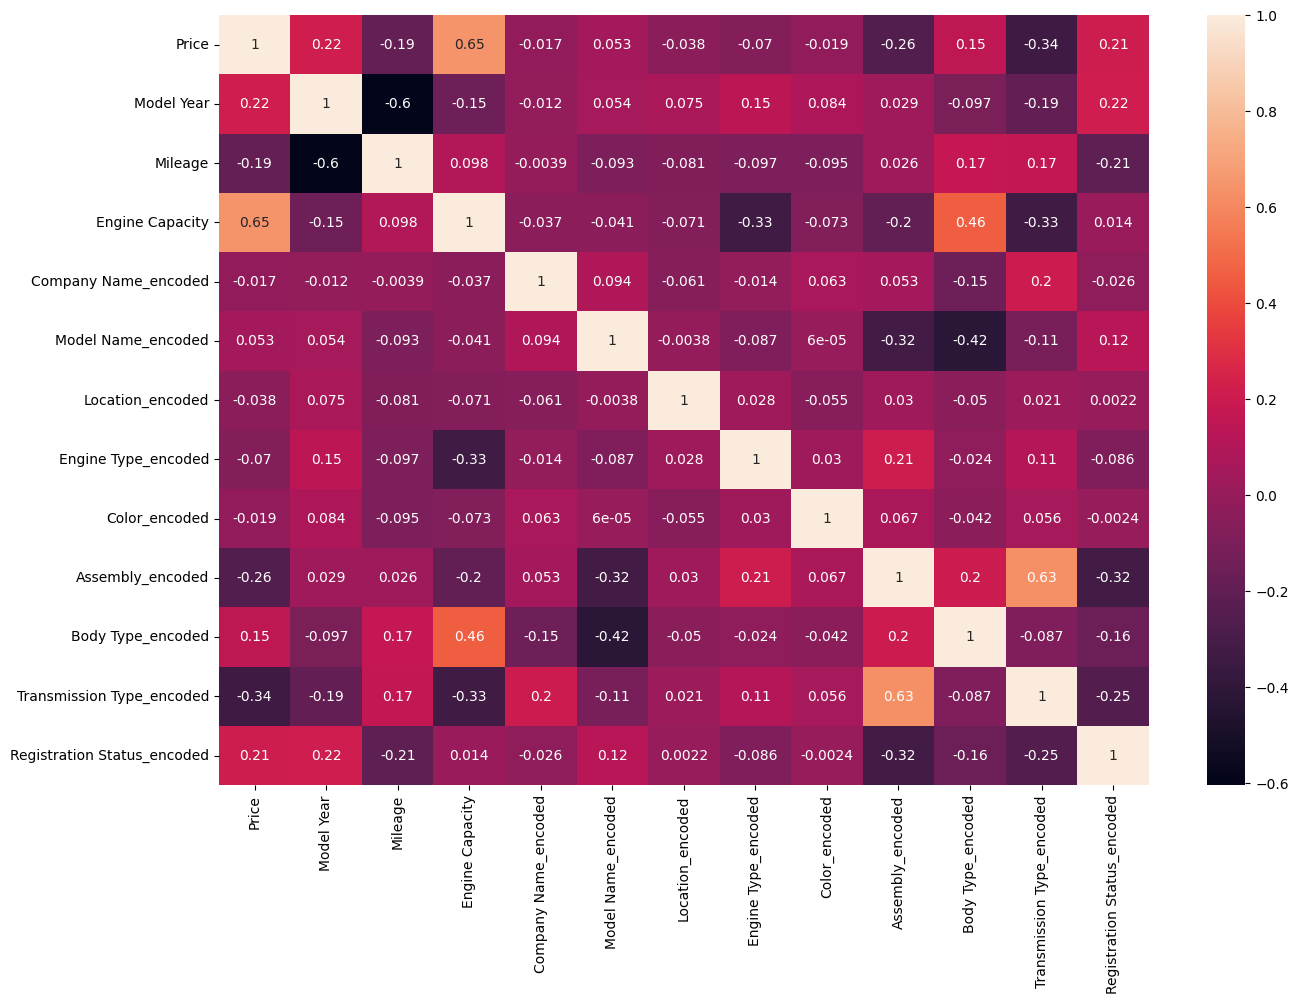

In [ ]:
corr_matrix = car.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 6) Model Building

In [ ]:
X = car.drop(['Price'], axis=1)
Y = car['Price']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=123, test_size=0.2)

In [ ]:
Xtrain.head()

,Model Year,Mileage,Engine Capacity,Company Name_encoded,Model Name_encoded,Location_encoded,Engine Type_encoded,Color_encoded,Assembly_encoded,Body Type_encoded,Transmission Type_encoded,Registration Status_encoded
42930,2006,88000,1000,28,181,4,2,18,0,1,0,0
15945,2015,59492,1000,27,183,4,2,21,1,1,1,0
5683,2018,35000,1800,10,49,2,2,21,1,4,0,0
38989,2016,48000,660,27,14,2,2,1,1,1,0,1
39436,2003,122000,1000,12,151,4,2,9,1,1,1,0


In [ ]:
Xtest.shape

(9205, 12)



*    Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT = DT.fit(Xtrain, Ytrain)
y_DT = DT.predict(Xtest)

In [ ]:
from sklearn.metrics import r2_score
r2_DT = r2_score(Ytest, y_DT)
r2_DT

0.9347363573931067

In [ ]:
from sklearn.metrics import mean_squared_error
mse_DT = mean_squared_error(Ytest, y_DT)
mse_DT

481769475324.2966

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_DT = mean_absolute_error(Ytest, y_DT)
mae_DT

207716.11863180576



*   Random Forest



In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF = RF.fit(Xtrain, Ytrain)
y_RF = RF.predict(Xtest)

In [ ]:
# RF.predict(Xtest.iloc[0:])
Xtrain.columns

Index(['Model Year', 'Mileage', 'Engine Capacity', 'Company Name_encoded',
       'Model Name_encoded', 'Location_encoded', 'Engine Type_encoded',
       'Color_encoded', 'Assembly_encoded', 'Body Type_encoded',
       'Transmission Type_encoded', 'Registration Status_encoded'],
      dtype='object')

In [ ]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(RF,f)

In [ ]:
with open('model.pkl','rb') as f:
  RF=pickle.load(f)

In [ ]:
RF.predict(Xtest)

array([2252550.        , 2627500.        , 2994100.        , ...,
        277355.45238095,  743100.        , 3066295.        ])

In [ ]:
r2_RF = r2_score(Ytest, y_RF)
r2_RF

0.9551899993432722

In [ ]:
mse_RF = mean_squared_error(Ytest, y_RF)
mse_RF

330782801010.7567

In [ ]:
mae_RF = mean_absolute_error(Ytest, y_RF)
mae_RF

169393.9173137996

*  Multiple Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR = MLR.fit(Xtrain, Ytrain)
y_MLR = MLR.predict(Xtest)

In [ ]:
r2_MLR = r2_score(Ytest, y_MLR)
r2_MLR

0.6018346934783718

In [ ]:
mse_MLR = mean_squared_error(Ytest, y_MLR)
mse_MLR

2939215207013.3066

In [ ]:
mae_MLR = mean_absolute_error(Ytest, y_MLR)
mae_MLR

853967.1003535123



*   Support Vector Regressor



In [ ]:
from sklearn.svm import SVR
SVR = SVR()
SVR = SVR.fit(Xtrain, Ytrain)
y_SVR = SVR.predict(Xtest)

In [ ]:
r2_SVR = r2_score(Ytest, y_SVR)
r2_SVR

-0.039676247416953414

In [ ]:
mse_SVR = mean_squared_error(Ytest, y_SVR)
mse_SVR

7674782776717.003

In [ ]:
mae_SVR = mean_absolute_error(Ytest, y_SVR)
mae_SVR

1123239.6681410659



*  Extreme Gradient Boosting (XGBoost)



In [ ]:
import xgboost as xgb
XGBoost = xgb.XGBRegressor()
XGBoost = XGBoost.fit(Xtrain, Ytrain)
y_XGBoost = XGBoost.predict(Xtest)

In [ ]:
r2_XGBoost = r2_score(Ytest, y_XGBoost)
r2_XGBoost

0.9466242440545551

In [ ]:
mse_XGBoost = mean_squared_error(Ytest, y_XGBoost)
mse_XGBoost

394014322672.1857

In [ ]:
mae_XGBoost = mean_absolute_error(Ytest, y_XGBoost)
mae_XGBoost

175544.72222212792



*  Least Absolute Shrinkage and Selection Operator (LASSO)



In [ ]:
from sklearn.linear_model import Lasso
LASSO = Lasso()
LASSO = LASSO.fit(Xtrain, Ytrain)
y_LASSO = LASSO.predict(Xtest)

In [ ]:
r2_LASSO = r2_score(Ytest, y_LASSO)
r2_LASSO

0.6018348372221778

In [ ]:
mse_LASSO = mean_squared_error(Ytest, y_LASSO)
mse_LASSO

2939214145911.3633

In [ ]:
mae_LASSO = mean_absolute_error(Ytest, y_LASSO)
mae_LASSO

853966.0478693111

In [ ]:
dp=pd.DataFrame(
 data={'model':['linear_regression'],'best_score':[r2_MLR,]})


In [ ]:
dp

,model,best_score
0,linear_regression,0.601835


# 7) Evaluation the model



*  R-Squared



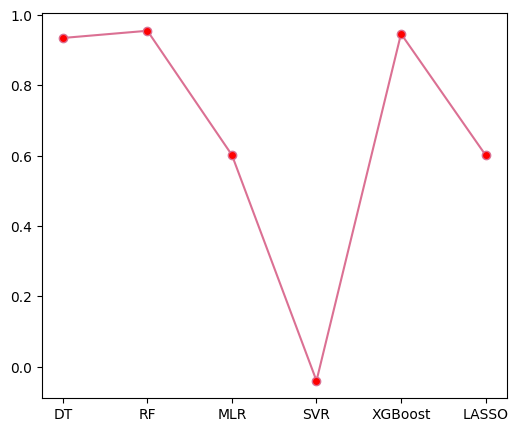

In [ ]:
plt.rcParams["figure.figsize"] = [6,5]
acc = [r2_DT, r2_RF, r2_MLR, r2_SVR, r2_XGBoost, r2_LASSO]
models = ['DT', 'RF', 'MLR', 'SVR', 'XGBoost', 'LASSO']

plt.plot(models,acc, color = 'palevioletred', marker = 'o', markerfacecolor = 'red')
plt.grid(False)
plt.show()



* Mean Squared Error (MSE)



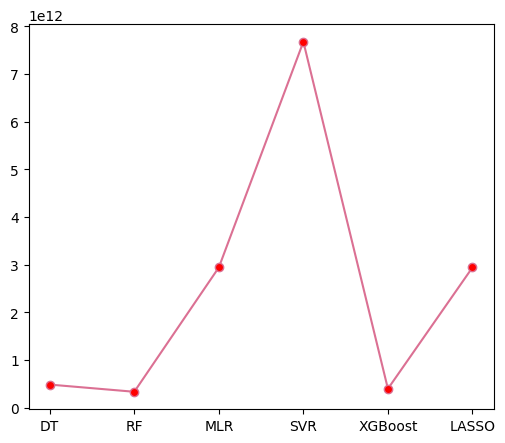

In [ ]:
plt.rcParams["figure.figsize"] = [6,5]
acc = [mse_DT, mse_RF, mse_MLR, mse_SVR, mse_XGBoost, mse_LASSO]
models = ['DT', 'RF', 'MLR', 'SVR', 'XGBoost', 'LASSO']

plt.plot(models,acc, color = 'palevioletred', marker = 'o', markerfacecolor = 'red')
plt.grid(False)
plt.show()



* Mean Absolute Error (MAE)


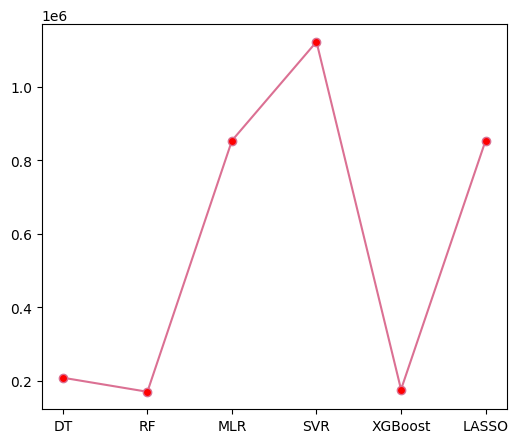

In [ ]:
plt.rcParams["figure.figsize"] = [6,5]
acc = [mae_DT, mae_RF, mae_MLR, mae_SVR, mae_XGBoost, mae_LASSO]
models = ['DT', 'RF', 'MLR', 'SVR', 'XGBoost', 'LASSO']

plt.plot(models,acc, color = 'palevioletred', marker = 'o', markerfacecolor = 'red')
plt.grid(False)
plt.show()

- ***Based on the evaluations, it can be concluded that the Random Forest (RF) model is the best model.***

In [ ]:
# x.to_csv('Cleaning_data.csv')